# CS1PX Semester 2024/25 - Assessed Assignment

- Marked out of 50 marks
- Worth 20% of course grade
- Due: **21th March 2025**

### Outline
**You are not allowed to use generative AI for this assignment.  If you are working online, be sure to turn it off before you start working.**

For this assignment, you will find a public dataset that you find interesting and produce Python code that reads in this data, stores it in a custom data structure, aggregates and subsets the data, and plots characteristics of the data using `matplotlib`.

You should read through the specifics of the assignment requirements *before* choosing your dataset to make sure you choose one that allows you to complete all the parts of this assignment.  For example, you will need something that allows the kinds of plot required.  If you don't know where to start looking for data, you could start with public datasets on: https://www.kaggle.com/datasets, https://datasetsearch.research.google.com/, https://data.gov.uk/.

If you are working with a dataset and there are a small number of lines that contain strings you cannot parse using the techniques we've used in CS1PX (e.g. they have commas in the middle of values) then you should adapt your code to ignore these lines.  

You will be marked on your code (including style and error-checking), as well as your text describing what you have done and the coding choices you have made.

Please be sure to use functions, arguments, and returns appropriately.


## Specifics of tasks and mark breakdown

You should:
- choose a public dataset that is in .csv format
    - If you find a dataset that is in, for example Excel format, it is fine to manually 'export' that to csv, and use that
- complete each of the following tasks
    
    
**Total marks possible: 50 marks**

Note: There are marks in this assignment for you reading a file yourself (e.g. by traversing the lines and splitting them, as we have in our lecture examples).  Please don't use existing Python CSV readers - if you do, then you won't be able to get those marks.  Similarly, there are marks for you designing and using your own data structure.  If you use the pandas package or similar, then you cannot get those marks.  



## Task A: Dataset and data structure ***(total 10 marks)***
1. describe your dataset in words, saying where you got it and what each of the columns means, including any units
    - **[2 marks]**
2. design a data structure to hold the information in your dataset, and justify your choice of data structure. Include an Python example of your data structure on a small example of your data.
    - **[4 marks]**
3. describe two other options for possible data structures, and say why they are not as good as the one that you chose.
    - **[4 marks]**

Additional notes on your data structure choice: If you chose a dataset with a very large number of columns you may want to disregard some of them.  In this case, you may discard some before you process the data in Python, then explain in the Task 1A where you got the data, why you kept the columns you did, and which columns you discarded.  You then don't need to explain the contents of the columns you have discarded.

In [ ]:
#1. i got my data set from kraggle, it is data on cleaned world water consumption,there wss however something like 500 lines of data with data from the year 2000 - 2024 for each country so i cut it down to just 2024 data
# , with columns for : Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%)
# ,Industrial Water Use (%),Household Water Use (%), Rainfall Impact (Annual Precipitation in mm) and Groundwater Depletion Rate (%)
#2. i will be using a dictionary of dictionarys to hold my data e.g:

water_usage = {"country" : {"year" : ,
"Total_water_consumption(BCM)" : , 
"Per capita water use(LPD)" : , 
"agricultural water use(%)" : ,
"industrial water use(%)" : ,
'household water use(%)' : ,
'rainfall impact(mm)' : ,
'ground water depletion rate(%)' :
}}

#3. other possible data structures that i did not use: list of lists, as it is harder to read and find need values as you must remember indexxing
#order due to no keys, a regular list was also not used as it does not support the inclusion of more than one country.


## Task B: Reading in your data ***(total 10 marks)***
1. write a function called `read_data(filename)` that takes your .csv `filename` as an argument, and `returns` an instance of the data structure you have devised.  You should use at least one example of defensive error-checking and one example of exception-catching.
    - **[10 marks: 4 for functional and logical code, 4 for error-checking, 2 for style and comments]**




In [65]:
def read_data(filename):
    
    
    with open(filename, "r") as f: # opens csv in read mode
        parentdict = {} # creates and empty dictionary to store the other dictionary
    
        nextline = f.readline() # skips header


         
        for line in f:       # loops through each line in the file

            bits = line.split(",")  # splits lines at each comma

            assert len(bits) == 9, "bits greater than 9" # checks if line contains more or less than 9 columns

            country = bits[0]

            parentdict[country] = {}  # creates nested dictionary

            # adds values to nested dictionary only the year is kept as a string rest are converted to float for future calculations
            try:
                parentdict[country]['year'] = bits[1]
                parentdict[country]['Total water consumption(BCM)'] = float(bits[2])          
                parentdict[country]['Per capita water use(LitresPerDay)'] = float(bits[3]) 
                parentdict[country]['Agricultural water use(%)'] = float(bits[4])
                parentdict[country]['Industrial water use(%)'] = float(bits[5])
                parentdict[country]['Household water use(%)'] = float(bits[6])
                parentdict[country]['Rainfall impact(mm)'] = float(bits[7])
                parentdict[country]['Groundwater depletion rate(%)'] = float(bits[8])
            except ValueError as e:
                print(f"Error: Could not convert data to string for {country} on line {line_number}")
            
    return parentdict  # returns the new dictionary

print(read_data("cleaned_global_water_consumption.csv"))

{'Argentina': {'year': '2024', 'Total water consumption(BCM)': 647.79, 'Per capita water use(LitresPerDay)': 364.3828571, 'Agricultural water use(%)': 51.20142857, 'Industrial water use(%)': 34.14285714, 'Household water use(%)': 23.52285714, 'Rainfall impact(mm)': 2283.157143, 'Groundwater depletion rate(%)': 2.285714286}, 'Australia': {'year': '2024', 'Total water consumption(BCM)': 644.005, 'Per capita water use(LitresPerDay)': 253.959, 'Agricultural water use(%)': 55.513, 'Industrial water use(%)': 29.457, 'Household water use(%)': 26.868, 'Rainfall impact(mm)': 1535.133, 'Groundwater depletion rate(%)': 1.656}, 'Brazil': {'year': '2024', 'Total water consumption(BCM)': 417.18875, 'Per capita water use(LitresPerDay)': 309.9975, 'Agricultural water use(%)': 55.47, 'Industrial water use(%)': 18.35625, 'Household water use(%)': 23.85875, 'Rainfall impact(mm)': 1354.0525, 'Groundwater depletion rate(%)': 2.8725}, 'Canada': {'year': '2024', 'Total water consumption(BCM)': 476.976875, 'P

## Task C: Aggregation and subsetting ***(total 15 marks)***
1. choose a characteristic of your data to filter (or subset) by, and write a function that takes as arguments the data structure and the specification of the characteristic and `returns` a subset of the data structure containing records that meet that characteristic:  similar to, for example `filterByRegion(dataStruct, regionString)` from our lab in Cycle 2.  Your function should be called `filter_by_characteristic`, and should take at least your data structure and the characteristic to match as arguments.  It should return the subset of the data in a data structure of the form you chose in Task A.
    - **[7 marks: 4 for functional and logical code, 2 for error-checking, 1 for style and comments]**
2. choose a characteristic of your data to aggregate by, and write a function that finds mean values of a numeric value of your data by that characteristic (similar to, for example, finding the mean price per unit for each region in the poturnip lab in Cycle 2), and `returns` this information.  Your function should `return` a `dict` with the characteristic groupings as keys (these are likely strings or integers), and the values as floating point numbers. For example, if you were finding the mean price per unit for the poturnip dataset the keys would be "Ashire", "Bshire", and "Cshire".  Your function should be called `aggregate_by_characteristic`.  **If you are confused about what this function should do, then please discuss with your tutor.**
    - **[8 marks: 5 for functional and logical code, 2 for error-checking, 1 for style and comments]**



In [71]:
read = read_data("cleaned_global_water_consumption.csv") # reads date from csv file and stores it in read variable

def filter(datastructure, country, characteristic):

    return f"{country}'s {characteristic} in 2024 is: {datastructure[country][characteristic]}"    # returns only the requested/filtered values


print(filter(read, "Argentina", "Total water consumption(BCM)"))

Argentina's Total water consumption(BCM) in 2024 is:647.79


In [75]:
def findmean(datastructure, characteristic):

    counter = 0   # creates counter to store number of elements
    sum = 0     # creates variable sum in order to store the total value of the characteristic
    for country in datastructure: # goes through each country in dictionary
        counter += 1     # adds one for each country 
        sum = sum + datastructure[country][characteristic]    # adds value of characteristic to sum variable
    mean = sum/counter       # divides total sum by counter 
    return f"the mean of the {counter} countrys {characteristic} is: {mean}"

findmean(read, "Total water consumption(BCM)")

'the mean of the 20 countrys Total water consumption(BCM) is: 499.7308294899999'

## Task D: Plotting ***(total 15 marks)***
1. Choosing an appropriate characteristic of your data to show, define a function to visualise that characteristic using either `.scatter` or `.plot` from `matplotlib`. Describe in words what your plot shows in terms of your data - that is, *do not* just say 'this shows a scatter plot of my data', but instead something about the relationship or lack of relationship in your data.
    - **[5 marks: 3 for functional and logical code including axis labels, 1 for code style, 1 for description]**
2. Choosing an appropriate characteristic of your data to show, define a function to visualise a histogram of that characteristic using `.hist` from `matplotlib`. Describe in words what your plot shows in terms of your data - that is, *do not* just say 'this shows a histogram of my data', but instead something about the distribution that is shown.
    - **[5 marks: 3 for functional code including axis labels, 1 for code style, 1 for description]**
2. Choosing an appropriate characteristic of your data to show, define a function to visualise that characteristic using some plot style from `matplotlib` other than plain (`plot()`) plotting, scatterplot, pie chart, or histogram. Describe in words what your plot shows and why you chose that style.
    - **[5 marks: 3 for functional code including axis labels or other appropriate labelling, 1 for code style, 1 for description]**



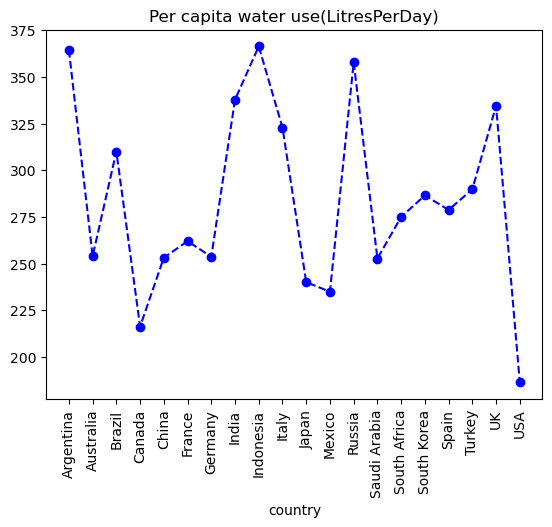

None


In [22]:
#q1) the data plottted tells us that contrary to what you might assume hotter countries aren't the only ones who consumed large amounts of water 
#per capita in 2024

import matplotlib.pyplot as plt

read = read_data("cleaned_global_water_consumption.csv")

def graph(datastruct, characteristic,):

    x = []   # creates empty lists for x and y values
    y = []


    for key, value in datastruct.items():  # iterates through each item in the dictionary 
        x.append(key)                      # add each items key to x dictiionary and each item or value in this case to y dictionary
        y.append(value[characteristic])

    plt.plot(x, y, color='blue', marker='o', linestyle='--')   # Create the line plot using x and y, with blue color, circular markers, and dashed lines
    plt.xlabel('country')     # labels x axis as country 
    plt.ylabel('')            # empty y label as its filled with values
    plt.title(f'{characteristic}')     # allows for the title to be whatever characteristic is given
    plt.xticks(rotation=90)     # rotates country names for no overlap
    plt.show()

print(graph(read,'Per capita water use(LitresPerDay)'))

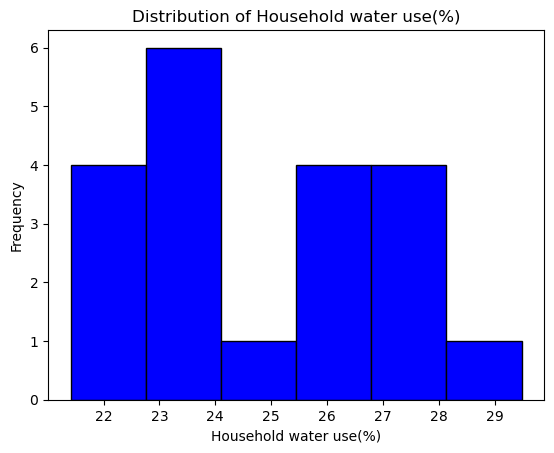

In [47]:
#Q2) The tallest bars show that the most common household water use percentages fall around 23% to 24%, where the frequency is highest with 6 occurrences.
# additionally the frequency drops significantly after 28%, showing that household water consumption rarely surpasses this percentage in most countries.


read = read_data("cleaned_global_water_consumption.csv")

def histogramm(datastruct, characteristic):
    
    y = []   # creates empty list to store characteristic as the y value

 
    for key, value in datastruct.items():  # iterates through finding values
        y.append(value[characteristic])     # stores values in empty list
    plt.hist(y, bins= 'auto', color='blue', edgecolor='black')  # graph customization no of bins set to auto because i wasn't sure how many to use
    plt.xlabel(characteristic)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {characteristic}')
    plt.show()
    
histogramm(read, 'Household water use(%)')

C:\Users\crawf\AppData\Local\Temp\ipykernel_4420\2528902301.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20c', len(countrys)).colors  # Optional for diverse colors


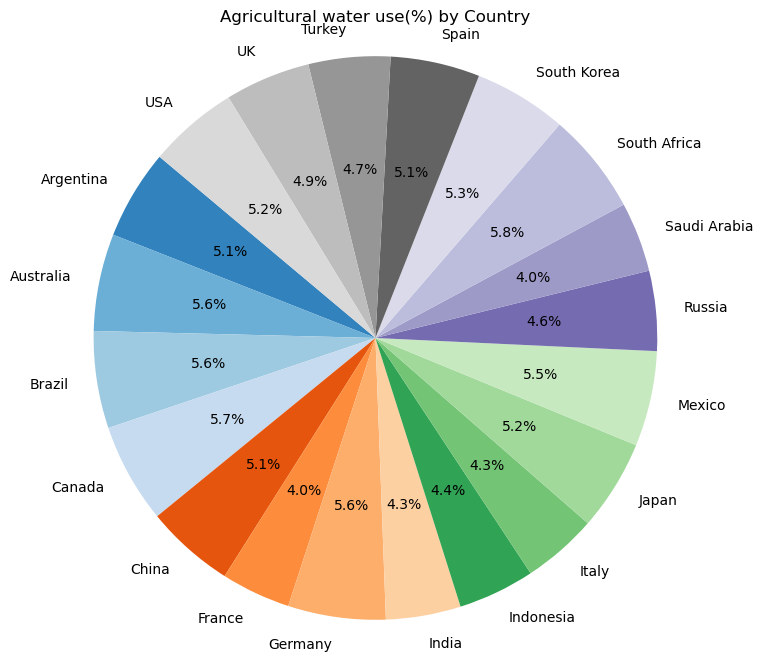

In [39]:

#Q3) i chose a pie chart because its very easy to read the data representd and from said represented data we can see the average agricultural water use
# on average is very similar with pretty equally sliced pieces of this graphc
read = read_data("cleaned_global_water_consumption.csv")

def piechartt(datastruct, characteristic):

    countrys = []  # List of countries
    sizes = []   # characteristic values list 

    for key, value in datastruct.items():
        countrys.append(key)  # Country names
        sizes.append(value[characteristic])  # Characteristic values

    
    colors = plt.cm.get_cmap('tab20c', len(countrys)).colors  # Optional for diverse colors

    
    plt.figure(figsize=(8, 8)) 
    plt.pie(sizes, 
            labels=countrys, 
            autopct='%1.1f%%',  # Show percentage on slices
            colors=colors, 
            startangle=140)  # Rotate the pie for better alignment
    
    plt.title(f'{characteristic} by Country')
    plt.axis('equal')  # Ensures pie is drawn as a circle
    plt.show()



piechartt(read, 'Agricultural water use(%)')
    
    

### What you should submit

You may submit either:
- a Jupyter notebook (I suggest this one with code and text additions) that contains your written descriptions and code
- and your .csv file.

Do not submit any file with an extension other than .py, .ipynb, or .csv  
- Please do not submit text files
- Please do not submit Word files
- Please do not submit Excel files
- Please do not submit pdf files
- Please do not submit html files